In [1]:
import numpy as np
import pandas as pd

In [2]:
from tqdm.notebook import tqdm
tqdm.pandas()

In [3]:
df = pd.read_csv("emotion-text-dataset/emotion_dataset.csv")
df

,Unnamed: 0,Emotion,Text,Clean_Text
0,0,neutral,Why ?,NaN
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...
...,...,...,...,...
34787,34787,surprise,@MichelGW have you gift! Hope you like it! It'...,gift Hope like it hand wear Itll warm Lol
34788,34788,joy,The world didnt give it to me..so the world MO...,world didnt meso world DEFINITELY cnt away
34789,34789,anger,A man robbed me today .,man robbed today
34790,34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO...",Youu JEALOUSY #Losing YOU


In [4]:
# drop "shame" to uniform the labels
df = df[df["Emotion"] != "shame"]

In [5]:
df["Emotion"].value_counts()

joy         11045
sadness      6722
fear         5410
anger        4297
surprise     4062
neutral      2254
disgust       856
Name: Emotion, dtype: int64

In [6]:
# making the labeling same as the speech
emotion_to_id_convert = {
    "surprise": 0,
    "neutral": 1,
    "joy": 2,
    "sadness": 3,
    "anger": 4,
    "fear": 5,
    "disgust": 6
}

emotions_dict = {
    0: 'surprised',
    1: 'neutral',
    2: 'happy',
    3: 'sad',
    4: 'angry',
    5: 'fearful',
    6: 'disgust'
}

In [7]:
df["Emotion_uniform"] = df["Emotion"].apply(lambda x: emotion_to_id_convert[x])
df.head()

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_37648/4020174303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Emotion_uniform"] = df["Emotion"].apply(lambda x: emotion_to_id_convert[x])


,Unnamed: 0,Emotion,Text,Clean_Text,Emotion_uniform
0,0,neutral,Why ?,NaN,1
1,1,joy,Sage Act upgrade on my to do list for tommorow.,Sage Act upgrade list tommorow,2
2,2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,WAY HOMEGIRL BABY FUNERAL MAN HATE FUNERALS SH...,3
3,3,joy,Such an eye ! The true hazel eye-and so brill...,eye true hazel eyeand brilliant Regular feat...,2
4,4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,ugh babe hugggzzz u babe naamazed nga ako e...,2


In [121]:
df[df["Emotion_uniform"] == 0].sample()["Text"].iloc[0]

"The feeling when you call your friend a couple of times and they don't pick and later accuse you of giving them missed calls!! "

In [8]:
# impute any nan text to empty string
df["Clean_Text"] = df["Clean_Text"].fillna("")

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_37648/342736732.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Clean_Text"] = df["Clean_Text"].fillna("")


In [9]:
df.drop(["Unnamed: 0", "Clean_Text", "Emotion"], axis=1, inplace=True)

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_37648/3318117705.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["Unnamed: 0", "Clean_Text", "Emotion"], axis=1, inplace=True)


In [10]:
df

,Text,Emotion_uniform
0,Why ?,1
1,Sage Act upgrade on my to do list for tommorow.,2
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,3
3,Such an eye ! The true hazel eye-and so brill...,2
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,2
...,...,...
34787,@MichelGW have you gift! Hope you like it! It'...,0
34788,The world didnt give it to me..so the world MO...,2
34789,A man robbed me today .,4
34790,"Youu call it JEALOUSY, I call it of #Losing YO...",5


Doing text cleaning on our own

In [11]:
import nltk
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer

stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()
detokenizer = TreebankWordDetokenizer()

In [14]:
def clean_text(text):
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = word_tokenize(text)
    # remove stopwords
    text = [token for token in text if token not in stop_words]
    # lemmatizer
    text = [lemmatizer.lemmatize(token) for token in text]

    # return detokenizer.detokenize(text).strip()
    return text

In [15]:
df["Clean_Text"] = df["Text"].progress_apply(clean_text)

  0%|          | 0/34646 [00:00<?, ?it/s]

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_37648/1937477319.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Clean_Text"] = df["Text"].progress_apply(clean_text)


In [23]:
df["Clean_Text_detok"] = df["Clean_Text"].progress_apply(lambda x: detokenizer.detokenize(x).strip())

  0%|          | 0/34646 [00:00<?, ?it/s]

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_37648/3863383790.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Clean_Text_detok"] = df["Clean_Text"].progress_apply(lambda x: detokenizer.detokenize(x).strip())


In [24]:
df.head()

,Text,Emotion_uniform,Clean_Text,Clean_Text_detok
0,Why ?,1,[Why],Why
1,Sage Act upgrade on my to do list for tommorow.,2,"[Sage, Act, upgrade, list, tommorow]",Sage Act upgrade list tommorow
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,3,"[ON, THE, WAY, TO, MY, HOMEGIRL, BABY, FUNERAL...",ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...
3,Such an eye ! The true hazel eye-and so brill...,2,"[Such, eye, The, true, hazel, eyeand, brillian...",Such eye The true hazel eyeand brilliant Regul...
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,2,"[Iluvmiasantos, ugh, babe, hugggzzz, u, babe, ...",Iluvmiasantos ugh babe hugggzzz u babe naamaze...


# Map Text to Embedding Dimension

In [255]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(lowercase=True, ngram_range=(1, 3), max_df=0.95, min_df=5)

In [256]:
y = df["Emotion_uniform"]

In [257]:
from sklearn.model_selection import train_test_split

In [258]:
# note that sometimes using "Text" instead of "Clean_Text" column yields better result

In [320]:
X_lin_train, X_lin_val, y_lin_train, y_lin_val = train_test_split(df["Clean_Text_detok"], y, random_state=3407, test_size=0.2, stratify=y)

In [321]:
X_lin_train = vectorizer.fit_transform(X_lin_train)
X_lin_val = vectorizer.transform(X_lin_val)

In [261]:
# import tensorflow_hub as hub

# module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
# use_model = hub.load(module_url)
# X_train = use_model(X_train).numpy()
# X_val = use_model(X_val).numpy()

In [322]:
X_lin_train.shape

(27716, 8506)

Check if y label is distributed correctly

In [323]:
y_lin_train.value_counts().sort_index()

0    3250
1    1803
2    8836
3    5377
4    3437
5    4328
6     685
Name: Emotion_uniform, dtype: int64

Try SMOTE

In [363]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=3407)

In [365]:
X_lin_train, y_lin_train = smote.fit_resample(X_lin_train, y_lin_train)

In [367]:
y_lin_train.value_counts().sort_index()

0    8836
1    8836
2    8836
3    8836
4    8836
5    8836
6    8836
Name: Emotion_uniform, dtype: int64

In [366]:
y_lin_val.value_counts().sort_index()

0     812
1     451
2    2209
3    1345
4     860
5    1082
6     171
Name: Emotion_uniform, dtype: int64

In [368]:
import torch
from torch.utils.data import Dataset, DataLoader

In [369]:
from utils import torch_device_seed, check_gpu, clear_device_cache

In [370]:
np.random.seed(3407)
torch.manual_seed(3407)
torch_device_seed(3407)

In [371]:
y_lin_val.to_numpy()

array([2, 2, 4, ..., 3, 2, 2])

# Modelling

In [372]:
import gc
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [373]:
device = check_gpu()

In [374]:
device

device(type='mps')

## Non-NN Models

In [375]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

In [484]:
import optuna

In [376]:
logreg = LogisticRegression(multi_class='ovr', random_state=3407)

logreg.fit(X_lin_train, y_lin_train)

LogisticRegression(multi_class='ovr', random_state=3407)

In [496]:
def objective(trial):
    c = trial.suggest_float('c', 0.1, 150, log=True)
    max_iter = trial.suggest_int('max_iter', 500, 2500, log=True)
    tol = trial.suggest_float("tol", 1e-6, 1e-2, log=True)
    multiclass = trial.suggest_categorical("multi_class", ['auto', 'ovr', 'multinomial'])
    solver = trial.suggest_categorical('solver', ['lbfgs', 'newton-cg'])
    if solver == "liblinear":
        dual = trial.suggest_categorical('dual', [True, False])
        classifier_obj = LogisticRegression(
            max_iter=max_iter,
            random_state=2024,
            penalty='l2',
            C=c,
            solver=solver,
            dual=dual,
            tol=tol,
            multi_class=multiclass
        )
    else:
        classifier_obj = LogisticRegression(
            max_iter=max_iter,
            random_state=2024,
            penalty='l2',
            C=c,
            solver=solver,
            tol=tol,
            multi_class=multiclass
        )
    
    # score = cross_val_score(classifier_obj, X_class_train_vec, y_class_train, n_jobs=-1, cv=3)
    classifier_obj.fit(X_lin_train, y_lin_train)
    y_lin_pred = classifier_obj.predict(X_lin_val)
    accuracy = accuracy_score(y_lin_val, y_lin_pred)

    return accuracy

In [497]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=150)
print(study.best_trial)

[I 2024-06-14 16:13:10,354] A new study created in memory with name: no-name-0cc3617b-fa11-4e6d-81a6-1f2a9f36e730
[I 2024-06-14 16:13:10,431] Trial 0 finished with value: 0.46984126984126984 and parameters: {'c': 0.3210599167514669, 'max_iter': 831, 'tol': 0.008254036255419686, 'multi_class': 'auto', 'solver': 'lbfgs'}. Best is trial 0 with value: 0.46984126984126984.
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[I 2024-06-14 16:13:20,220] Trial 1 finished with value: 0.5705627705627706 an

FrozenTrial(number=143, state=1, values=[0.602020202020202], datetime_start=datetime.datetime(2024, 6, 14, 16, 19, 18, 150630), datetime_complete=datetime.datetime(2024, 6, 14, 16, 19, 20, 549878), params={'c': 3.2084436981919744, 'max_iter': 1548, 'tol': 1.0993608291010027e-05, 'multi_class': 'ovr', 'solver': 'lbfgs'}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'c': FloatDistribution(high=150.0, log=True, low=0.1, step=None), 'max_iter': IntDistribution(high=2500, log=True, low=500, step=1), 'tol': FloatDistribution(high=0.01, log=True, low=1e-06, step=None), 'multi_class': CategoricalDistribution(choices=('auto', 'ovr', 'multinomial')), 'solver': CategoricalDistribution(choices=('lbfgs', 'newton-cg'))}, trial_id=143, value=None)


In [498]:
logreg = LogisticRegression(
    C=3.2084436981919744,
    max_iter=1548,
    tol=1.0993608291010027e-05,
    multi_class='ovr',
    solver='lbfgs',
    random_state=3407
)

logreg.fit(X_lin_train, y_lin_train)

LogisticRegression(C=3.2084436981919744, max_iter=1548, multi_class='ovr',
                   random_state=3407, tol=1.0993608291010027e-05)

In [470]:
ranfor = RandomForestClassifier(n_estimators=450, random_state=3407)

ranfor.fit(X_lin_train, y_lin_train)

RandomForestClassifier(n_estimators=450, random_state=3407)

In [471]:
xgb = XGBClassifier()

xgb.fit(X_lin_train, y_lin_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [499]:
y_lin_pred = logreg.predict(X_lin_val)
# y_lin_pred = ranfor.predict(X_lin_val)
# y_lin_pred = xgb.predict(X_lin_val)

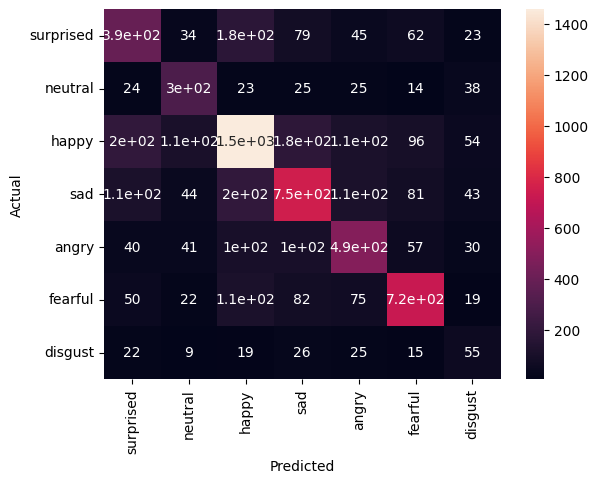

In [503]:
cm = pd.DataFrame(confusion_matrix(y_lin_val, y_lin_pred), index=emotions_dict.values(), columns=emotions_dict.values())
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [504]:
accuracy_score(y_lin_val, y_lin_pred)

0.602020202020202

## Linear Model

In [390]:
class EmotionDataset(Dataset):
    def __init__(self, data, labels=None):
        # labels none for test data that doesn't have labels
        self.data = data.toarray().astype(np.float32)
        self.labels = labels.to_numpy() if labels is not None else np.zeros(data.shape[0])


    def __len__(self):
        return self.data.shape[0]


    def __getitem__(self, index):
        return self.data[index], self.labels[index]

In [391]:
train_lin_ds = EmotionDataset(X_lin_train, y_lin_train)
train_lin_loader = DataLoader(train_lin_ds, batch_size=16, shuffle=True)

val_lin_ds = EmotionDataset(X_lin_val, y_lin_val)
val_lin_loader = DataLoader(val_lin_ds, batch_size=16, shuffle=False)

In [392]:
for x in train_lin_loader:
    print(x[0].shape)
    break

torch.Size([16, 8506])


In [393]:
class SimpleLinearModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleLinearModel, self).__init__()

        self.linear1 = nn.Linear(input_size, 128)
        self.linear2 = nn.Linear(128, 64)
        self.dropout1 = nn.Dropout(0.5)
        self.linear3 = nn.Linear(64, output_size)


    def forward(self, inputs):
        # we assume the inputs already in embedding dimension
        output = F.relu(self.linear1(inputs))
        output = F.relu(self.linear2(output))
        output = self.dropout1(output)
        output = F.softmax(self.linear3(output), dim=1)

        return output

In [395]:
linear_model = SimpleLinearModel(input_size=X_lin_train.shape[1], output_size=len(emotions_dict)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(linear_model.parameters(), lr=0.001, weight_decay=1e-5)

In [396]:
EPOCHS = 20

In [397]:
def fit(model, criterion, optimizer, train_loader, val_loader, epochs=EPOCHS):
    train_accuracies = []
    val_accuracies = []
    train_losses = []
    val_losses = []

    for epoch in range(epochs):  # Loop over the dataset multiple times
        running_loss = 0.0
        total = 0
        correct = 0
        model.train()
        for inputs, labels in train_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
    
            optimizer.zero_grad()
    
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
    
            running_loss += loss.item() 

            _, predicted = torch.max(outputs.data, axis=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
        # get train loss and accuracy
        train_loss = running_loss / len(train_loader.dataset)
        train_accuracy = correct / total
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
    
        # get test loss and accuracy
        val_loss = 0.0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            model.eval()
            for data in val_loader:
                inputs, labels = data
                inputs = inputs.to(device)
                labels = labels.to(device)

                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, axis=1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        val_accuracy = val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        print(f"Epoch {epoch}: train_loss: {train_loss:.4f}; train_accuracy: {train_accuracy:.4f}; val_loss: {val_loss:.4f}; val_accuracy: {val_accuracy:.4f}")

    return {
        "train_loss": train_losses,
        "train_accuracy": train_accuracies,
        "val_loss": val_losses,
        "val_accuracy": val_accuracies
    }

In [398]:
clear_device_cache()

In [399]:
linear_model_result = fit(linear_model, criterion, optimizer, train_lin_loader, val_lin_loader, epochs=EPOCHS)

Epoch 0: train_loss: 0.1040; train_accuracy: 0.5051; val_loss: 1.5839; val_accuracy: 0.5765
Epoch 1: train_loss: 0.0978; train_accuracy: 0.6017; val_loss: 1.5716; val_accuracy: 0.5887
Epoch 2: train_loss: 0.0965; train_accuracy: 0.6221; val_loss: 1.5721; val_accuracy: 0.5886
Epoch 3: train_loss: 0.0958; train_accuracy: 0.6340; val_loss: 1.5706; val_accuracy: 0.5921
Epoch 4: train_loss: 0.0952; train_accuracy: 0.6424; val_loss: 1.5664; val_accuracy: 0.5944
Epoch 5: train_loss: 0.0948; train_accuracy: 0.6495; val_loss: 1.5660; val_accuracy: 0.5960
Epoch 6: train_loss: 0.0945; train_accuracy: 0.6553; val_loss: 1.5699; val_accuracy: 0.5934
Epoch 7: train_loss: 0.0941; train_accuracy: 0.6607; val_loss: 1.5616; val_accuracy: 0.6004
Epoch 8: train_loss: 0.0937; train_accuracy: 0.6670; val_loss: 1.5619; val_accuracy: 0.6003
Epoch 9: train_loss: 0.0936; train_accuracy: 0.6697; val_loss: 1.5622; val_accuracy: 0.5984
Epoch 10: train_loss: 0.0932; train_accuracy: 0.6754; val_loss: 1.5614; val_accu

In [400]:
import matplotlib.pyplot as plt
%matplotlib inline

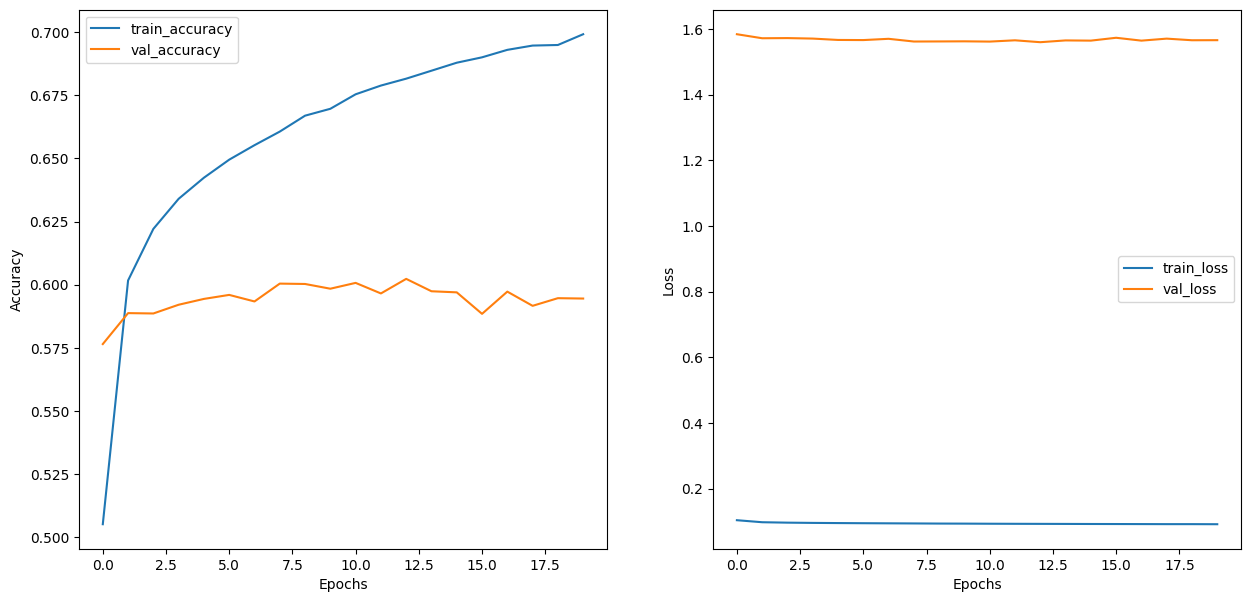

In [401]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)

plt.plot(linear_model_result["train_accuracy"], label="train_accuracy")
plt.plot(linear_model_result["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(linear_model_result["train_loss"], label="train_loss")
plt.plot(linear_model_result["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [402]:
import datetime
PATH = f"models/torch_text_linear_model_{datetime.datetime.now().strftime('%Y.%m.%d.%H.%M.%S')}.pth"
print(PATH)

# save model
torch.save(linear_model.state_dict(), PATH)

# load model, UNCOMMENT this so no need to train again
# model = torch.load(PATH)

models/torch_text_linear_model_2024.06.14.14.32.11.pth


## Recurrent Model
start with the dataset first

In [403]:
from torch.nn.utils.rnn import pad_sequence
from torchtext.vocab import build_vocab_from_iterator
from collections import Counter

In [404]:
selected_column = "Clean_Text"

In [405]:
# from clean text column, convert to vocab id
counts = Counter()
for row in df["Clean_Text"]:
    counts.update(row)

# deleting infrequent words
MIN_COUNT = 2

print("num_words before:",len(counts.keys()))
for word in list(counts):
    if counts[word] < MIN_COUNT:
        del counts[word]
print("num_words after:",len(counts.keys()))

num_words before: 45496
num_words after: 17833


In [406]:
vocab2index = {"":0, "UNK":1}
words = ["", "UNK"]
for word in counts:
    vocab2index[word] = len(words)
    words.append(word)

In [407]:
def encode_sentence(text, vocab2index, max_len=50):
    encoded = np.zeros(max_len, dtype=int)
    enc1 = np.array([vocab2index.get(word, vocab2index["UNK"]) for word in text])
    length = min(max_len, len(enc1)) # if above max len, cut the rest
    encoded[:length] = enc1[:length]

    return encoded

In [408]:
df["Clean_Text_Encoded"] = df["Clean_Text"].progress_apply(lambda x: np.array(encode_sentence(x, vocab2index)))
df.head()

  0%|          | 0/34646 [00:00<?, ?it/s]

/var/folders/d_/43yhfw3n2wx5mg7dg0cxjld00000gn/T/ipykernel_37648/1032533658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Clean_Text_Encoded"] = df["Clean_Text"].progress_apply(lambda x: np.array(encode_sentence(x, vocab2index)))


,Text,Emotion_uniform,Clean_Text,Clean_Text_detok,Clean_Text_Encoded
0,Why ?,1,[Why],Why,"[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,Sage Act upgrade on my to do list for tommorow.,2,"[Sage, Act, upgrade, list, tommorow]",Sage Act upgrade list tommorow,"[1, 3, 4, 5, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...,3,"[ON, THE, WAY, TO, MY, HOMEGIRL, BABY, FUNERAL...",ON THE WAY TO MY HOMEGIRL BABY FUNERAL MAN I H...,"[7, 8, 9, 10, 11, 1, 12, 1, 13, 14, 15, 1, 16,..."
3,Such an eye ! The true hazel eye-and so brill...,2,"[Such, eye, The, true, hazel, eyeand, brillian...",Such eye The true hazel eyeand brilliant Regul...,"[21, 22, 23, 24, 1, 1, 25, 1, 26, 27, 28, 1, 2..."
4,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...,2,"[Iluvmiasantos, ugh, babe, hugggzzz, u, babe, ...",Iluvmiasantos ugh babe hugggzzz u babe naamaze...,"[1, 55, 56, 1, 57, 56, 1, 58, 59, 60, 56, 60, ..."


In [525]:
X_train, X_val, y_train, y_val = train_test_split(df["Clean_Text_Encoded"], y, random_state=3407, test_size=0.2, stratify=y)

In [526]:
class TextEmotionDataset(Dataset):
    def __init__(self, data, labels=None):
        self.texts = data.to_numpy() # the assumption is already vocab id
        self.labels = labels.to_list()

    
    def __len__(self):
        return len(self.texts)


    def __getitem__(self, index):
        text = self.texts[index]
        label = torch.tensor(self.labels[index], dtype=torch.long)
        return text, label

In [527]:
train_ds = TextEmotionDataset(X_train, y_train)
train_loader = DataLoader(train_ds, batch_size=16, shuffle=True)

val_ds = TextEmotionDataset(X_val, y_val)
val_loader = DataLoader(val_ds, batch_size=16, shuffle=False)

In [528]:
vocab_size = len(counts.keys())
vocab_size

17833

In [529]:
for x in val_loader:
    print(x[0].shape)
    break

torch.Size([16, 50])


In [424]:
class RecurrentModel(nn.Module):
    def __init__(self, vocab_size, output_size):
        super(RecurrentModel, self).__init__()

        self.vocab_size = vocab_size

        self.embedding = nn.Embedding(vocab_size, embedding_dim=128)
        self.lstm = nn.LSTM(128, hidden_size=64, num_layers=2, bidirectional=False, dropout=0.1)

        self.linear1 = nn.Linear(64, 64)
        self.dropout1 = nn.Dropout(0.2)
        self.linear2 = nn.Linear(64, output_size)


    def forward(self, input_text):
        embedding_output = self.embedding(input_text)

        lstm_output, (hidden_state, cell_state) = self.lstm(embedding_output)

        # final_hidden_state = torch.cat((hidden_state[-2,:,:], hidden_state[-1,:,:]), dim = 1)

        # print(final_hidden_state.shape, cell_state.shape, lstm_output.shape, hidden_state.shape)

        output = F.relu(self.linear1(lstm_output[:, -1]))
        # output = F.relu(self.linear1(final_hidden_state))
        output = self.dropout1(output)
        output = self.linear2(output)

        # print(torch.max(output.data, axis=1)) # it almost always predicts emotion 2

        return output

In [460]:
rnn_model = RecurrentModel(vocab_size, output_size=len(emotions_dict)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(rnn_model.parameters(), lr=0.0001, weight_decay=1e-5)

In [461]:
rnn_model_result = fit(rnn_model, criterion, optimizer, train_loader, val_loader, epochs=EPOCHS)

Epoch 0: train_loss: 0.1110; train_accuracy: 0.3121; val_loss: 1.7539; val_accuracy: 0.3186
Epoch 1: train_loss: 0.1101; train_accuracy: 0.3187; val_loss: 1.7529; val_accuracy: 0.3186
Epoch 2: train_loss: 0.1100; train_accuracy: 0.3187; val_loss: 1.7534; val_accuracy: 0.3186
Epoch 3: train_loss: 0.1099; train_accuracy: 0.3188; val_loss: 1.7529; val_accuracy: 0.3188
Epoch 4: train_loss: 0.1098; train_accuracy: 0.3188; val_loss: 1.7526; val_accuracy: 0.3188
Epoch 5: train_loss: 0.1099; train_accuracy: 0.3188; val_loss: 1.7529; val_accuracy: 0.3188
Epoch 6: train_loss: 0.1099; train_accuracy: 0.3188; val_loss: 1.7527; val_accuracy: 0.3188
Epoch 7: train_loss: 0.1098; train_accuracy: 0.3188; val_loss: 1.7525; val_accuracy: 0.3188
Epoch 8: train_loss: 0.1098; train_accuracy: 0.3188; val_loss: 1.7527; val_accuracy: 0.3188
Epoch 9: train_loss: 0.1098; train_accuracy: 0.3188; val_loss: 1.7519; val_accuracy: 0.3188
Epoch 10: train_loss: 0.1097; train_accuracy: 0.3188; val_loss: 1.7527; val_accu

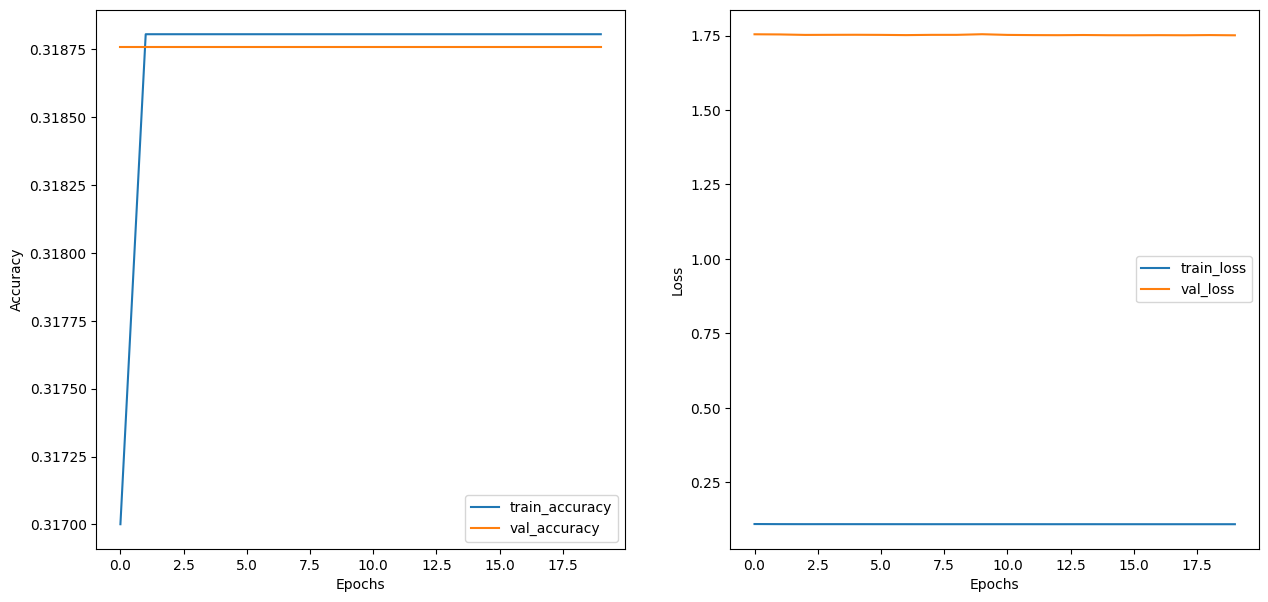

In [427]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)

plt.plot(rnn_model_result["train_accuracy"], label="train_accuracy")
plt.plot(rnn_model_result["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(rnn_model_result["train_loss"], label="train_loss")
plt.plot(rnn_model_result["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [463]:
PATH = f"models/torch_text_rnn_model_{datetime.datetime.now().strftime('%Y.%m.%d.%H.%M.%S')}.pth"
print(PATH)

# save model
torch.save(rnn_model.state_dict(), PATH)

models/torch_text_rnn_model_2024.06.14.15.17.50.pth


## Convolutional Model

In [530]:
for x in train_loader:
    print(x[0].shape)
    break

torch.Size([16, 50])


In [540]:
class ConvolutionalModel(nn.Module):
    def __init__(self, vocab_size, output_size):
        super(ConvolutionalModel, self).__init__()

        self.vocab_size = vocab_size

        self.embedding = nn.Embedding(vocab_size, embedding_dim=128, padding_idx=1)
        self.conv1 = nn.Conv1d(128, 64, 3)
        self.conv2 = nn.Conv1d(64, 32, 3)
        self.dropout1 = nn.Dropout(0.1)
        self.linear_size = 32 * 46
        self.linear1 = nn.Linear(self.linear_size, 64)
        self.dropout2 = nn.Dropout(0.1)
        self.linear2 = nn.Linear(64, output_size)

    
    def forward(self, input_text):
        embedded = self.embedding(input_text)
        # embedded = [batch size, seq len, embedding dim]
        # need to convert to:
        # embedded = [batch size, embedding dim, seq len]
        embedded = embedded.permute(0, 2, 1)
        output = F.relu(self.conv1(embedded))
        output = F.relu(self.conv2(output))
        output = self.dropout1(output).view(-1, self.linear_size)
        output = F.relu(self.linear1(output))
        output = self.dropout2(output)
        output = self.linear2(output) # no need softmax

        return output

In [541]:
cnn_model = ConvolutionalModel(vocab_size, output_size=len(emotions_dict)).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001, weight_decay=1e-5)

In [542]:
cnn_model_result = fit(cnn_model, criterion, optimizer, train_loader, val_loader, epochs=EPOCHS)

Epoch 0: train_loss: 0.0952; train_accuracy: 0.4043; val_loss: 1.3314; val_accuracy: 0.4898
Epoch 1: train_loss: 0.0756; train_accuracy: 0.5553; val_loss: 1.1524; val_accuracy: 0.5886
Epoch 2: train_loss: 0.0605; train_accuracy: 0.6618; val_loss: 1.0942; val_accuracy: 0.6154
Epoch 3: train_loss: 0.0493; train_accuracy: 0.7312; val_loss: 1.1111; val_accuracy: 0.6234
Epoch 4: train_loss: 0.0403; train_accuracy: 0.7811; val_loss: 1.2566; val_accuracy: 0.6079
Epoch 5: train_loss: 0.0329; train_accuracy: 0.8222; val_loss: 1.3660; val_accuracy: 0.6117
Epoch 6: train_loss: 0.0265; train_accuracy: 0.8555; val_loss: 1.4601; val_accuracy: 0.6115
Epoch 7: train_loss: 0.0214; train_accuracy: 0.8856; val_loss: 1.7140; val_accuracy: 0.6098
Epoch 8: train_loss: 0.0180; train_accuracy: 0.9015; val_loss: 1.9366; val_accuracy: 0.6048
Epoch 9: train_loss: 0.0151; train_accuracy: 0.9190; val_loss: 2.1860; val_accuracy: 0.6022
Epoch 10: train_loss: 0.0137; train_accuracy: 0.9260; val_loss: 2.2781; val_accu

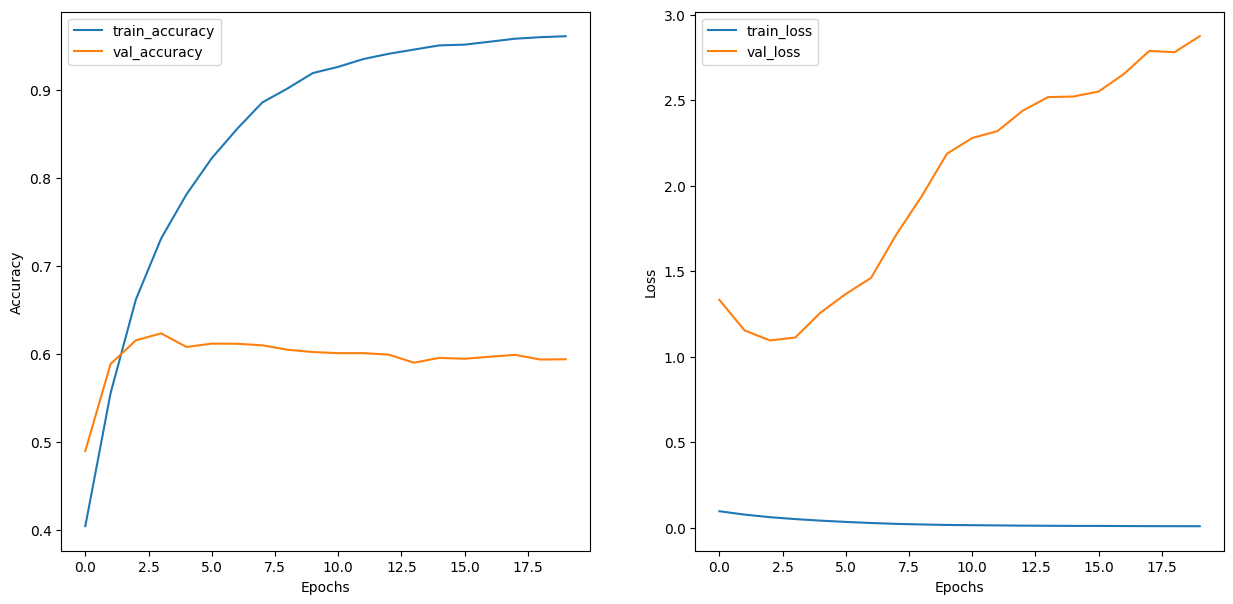

In [543]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)

plt.plot(cnn_model_result["train_accuracy"], label="train_accuracy")
plt.plot(cnn_model_result["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_model_result["train_loss"], label="train_loss")
plt.plot(cnn_model_result["val_loss"], label="val_loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [544]:
PATH = f"models/torch_text_cnn_model_{datetime.datetime.now().strftime('%Y.%m.%d.%H.%M.%S')}.pth"
print(PATH)

# save model
torch.save(cnn_model.state_dict(), PATH)

models/torch_text_cnn_model_2024.06.14.16.29.50.pth


# Predict

In [435]:
def predict_linear(model, text, label=None):
    # a use of linear model
    print(text)
    text_embedding = vectorizer.transform([text]).toarray().astype(np.float32)

    with torch.no_grad():
        model.eval()
        outputs = model(torch.tensor(text_embedding).to(device))
        _, predicted = torch.max(outputs.data, axis=1)
    
        predicted = predicted.cpu().numpy()

    print("Detected Emotion:", emotions_dict[predicted[0]])
    if label is not None:
        print("Actual Emotion  :", emotions_dict[label])

In [436]:
predict_linear(linear_model, "I hate this country")

I hate this country
Detected Emotion: disgust


In [453]:
val_data_test = np.random.choice(y_val.index)
test_sample = df.loc[val_data_test]
test_sample

Text                  I only tweet what's on my mind and shit that I...
Emotion_uniform                                                       3
Clean_Text            [I, tweet, whats, mind, shit, I, feel, nd, hel...
Clean_Text_detok      I tweet whats mind shit I feel nd help ppl lov...
Clean_Text_Encoded    [14, 2845, 1424, 1925, 504, 14, 936, 6549, 270...
Name: 24655, dtype: object

In [438]:
predict_linear(linear_model, test_sample["Clean_Text_detok"], test_sample["Emotion_uniform"])

Even Itll romantic I think Youll load fun
Detected Emotion: surprised
Actual Emotion  : happy


In [439]:
def predict_nonlin(model, text, label=None):
    # use rnn model
    # convert to vocab id
    print(text)
    text_encoded = encode_sentence(text, vocab2index)
    text_encoded = text_encoded.reshape(-1, text_encoded.shape[0])

    with torch.no_grad():
        model.eval()
        output = model(torch.tensor(text_encoded).to(device))
        _, predicted = torch.max(output.data, axis=1)

        predicted = predicted.cpu().numpy()

    print("Detected Emotion:", emotions_dict[predicted[0]])
    if label is not None:
        print("Actual Emotion  :", emotions_dict[label])

In [440]:
predict_nonlin(cnn_model, "I hate this country")

I hate this country
Detected Emotion: sad


In [441]:
predict_nonlin(cnn_model, test_sample["Text"], test_sample["Emotion_uniform"])

 Even those . It'll be very romantic , I think . You'll have loads of fun . 
Detected Emotion: happy
Actual Emotion  : happy


# Confusion Matrix

In [442]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [505]:
def conf_matrix(model, val_loader):
    pred = []
    labs = []
    with torch.no_grad():
        model.eval()
        for data in val_loader:
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            _, predicted = torch.max(outputs.data, axis=1)
            labs.extend(labels.cpu().numpy())
            pred.extend(predicted.cpu().numpy())

    accuracy = accuracy_score(labs, pred)
    conf_mat = confusion_matrix(labs, pred)
    print("Accuracy:", accuracy)
    cm = pd.DataFrame(conf_mat, index=emotions_dict.values(), columns=emotions_dict.values())
    sns.heatmap(cm, annot=True)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

Accuracy: 0.5945165945165946


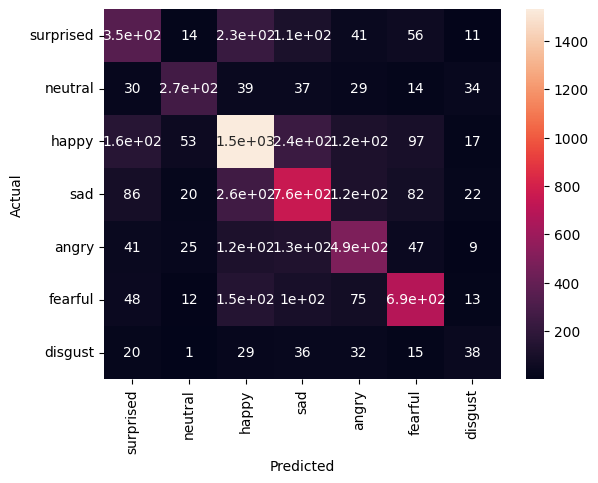

In [506]:
conf_matrix(linear_model, val_lin_loader)

Accuracy: 0.31875901875901874


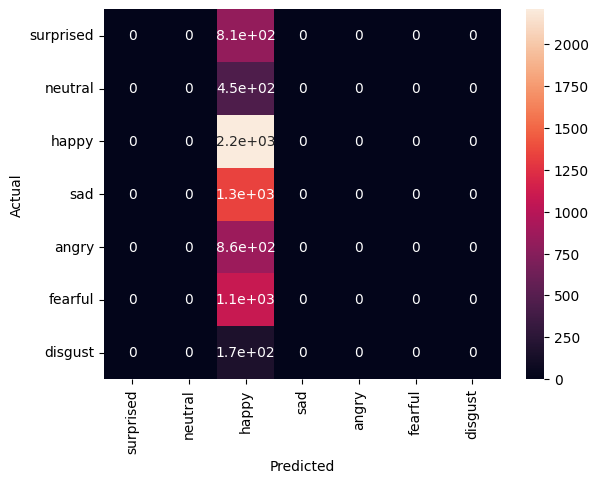

In [507]:
conf_matrix(rnn_model, val_loader)

Accuracy: 0.6088023088023088


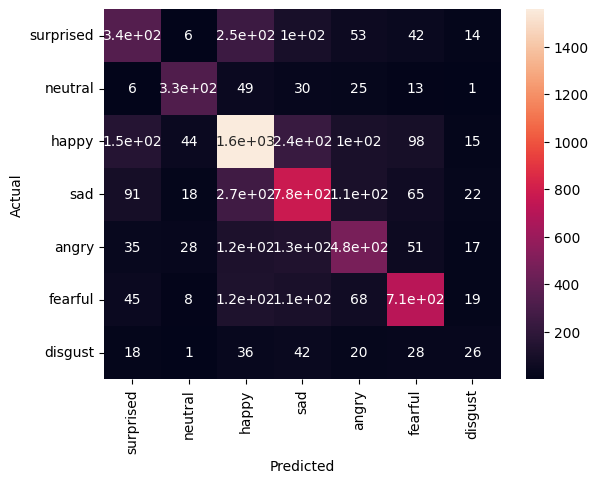

In [508]:
conf_matrix(cnn_model, val_loader)